In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

https://stackoverflow.com/questions/74852797/wrap-model-with-sklearn-interface

# Proposta:

1. Dividir em treino e teste, (80, 20 ou 90, 10)
2. No set de treino, aplicar a crossvalidação para tuning
3. Com o modelo já selecionado, usar o treiná-lo o conjunto de teste para ter a ideia do desempenho em dados novos

(https://www.rasgoml.com/feature-engineering-tutorials/scikit-learn-time-series-split)

In [50]:
df = pd.read_csv("../databases/tratado/consumo residencial por UF/consumo residencial bahia.csv",index_col=0)

In [51]:
df.head(5)

,consumo
data,
31/01/2004,294798
29/02/2004,269980
31/03/2004,276717
30/04/2004,290815
31/05/2004,282304


In [52]:
df.tail(5)

,consumo
data,
31/08/2023,612484
30/09/2023,655231
31/10/2023,661873
30/11/2023,703405
31/12/2023,718461


In [53]:
#Converter o tipo do indice para data
df.index = pd.to_datetime(df.index, format="%d/%m/%Y")

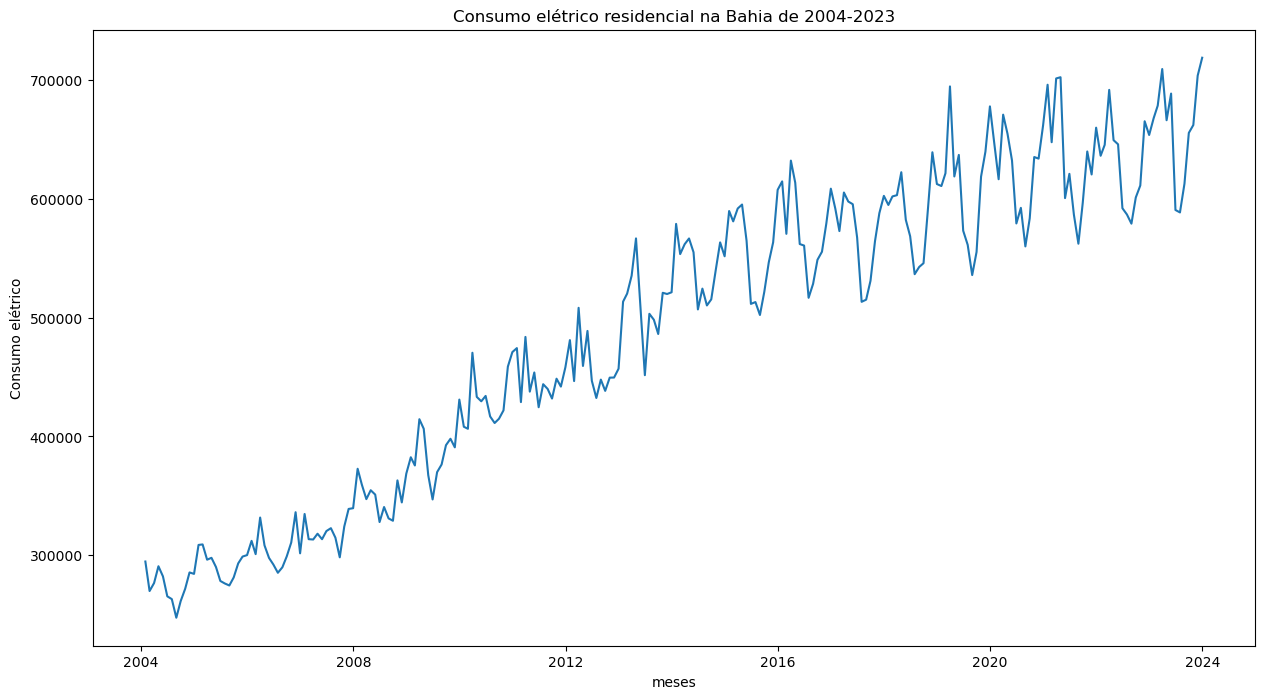

In [54]:
plt.figure(figsize=(15,8))
plt.plot(df.index, df["consumo"], label="Consumo elétrico mensal residencial na Bahia, 2004-2023")
plt.ylabel("Consumo elétrico")
plt.xlabel("meses")
plt.title("Consumo elétrico residencial na Bahia de 2004-2023")
plt.show()

In [55]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:i + time_steps]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [56]:
#Separando em treino e teste
TREINO_PROPORCAO = .8
tamanho = len(df)
treino_df=df.iloc[:int(tamanho * TREINO_PROPORCAO)].copy()
teste_df = df.iloc[int(tamanho * TREINO_PROPORCAO):].copy()

In [57]:
scaler = MinMaxScaler()
escalado_treino_validacao = scaler.fit_transform(treino_df)
escalado_teste = scaler.transform(teste_df)

In [58]:
tss = TimeSeriesSplit(5)

In [59]:
TIME_STEPS = 5
x_treinos = []
y_treinos = []

x_validacoes = []
y_validacoes = []
for treino_index, validacao_index in tss.split(escalado_treino_validacao):
    treino, validacao = escalado_treino_validacao[treino_index, :], escalado_treino_validacao[validacao_index, :]
    X, y = create_dataset(treino, treino, TIME_STEPS)    
    x_treinos.append(X)
    y_treinos.append(y)

    X, y = create_dataset(validacao, validacao, TIME_STEPS)
    x_validacoes.append(X)
    y_validacoes.append(y)
